<a href="https://colab.research.google.com/github/jiiwon129/EWHA/blob/main/HW3_DL_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Problem 1. Short Question**

**(a) 아래는 Neural Network의 학습 절차에 대한 그림이다. 이 그림을 토대로 Neural Network의
학습 절차에 대해 설명하시오.**
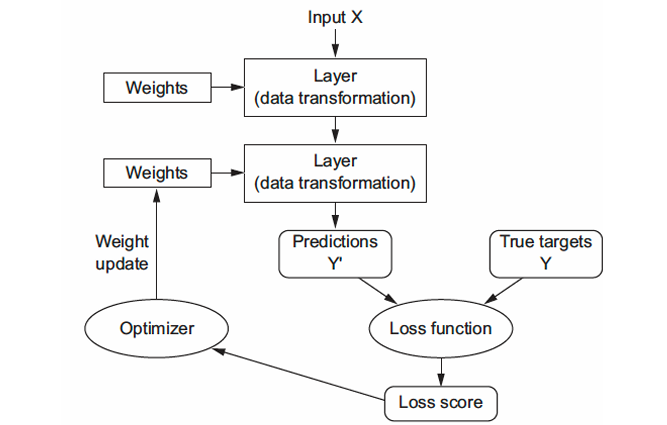

신경망(Neural Network) 학습의 목적
- 전체 네트워크의 층과 층 사이에서의 연산에 사용되는 모든 가중치들의 최적값을 찾는 것
- 모델에 따라 정의한 loss가 충분히 줄어들 때까지 가중치의 업데이트를 반복하는 것

< 학습 절차 >
1. 배치 사이즈만큼의 훈련 샘플 (x, y)를 가져와 입력층에 데이터 x를 입력한다.
2. 전체 네트워크를 따라 가중치(weight)를 곱하고 활성함수를 거쳐 데이터를 변환하고 출력값 $\hat y$를 계산한다.
3. 출력된 $\hat y$와 실제 $y$값의 오차를 사용해 현재 배치 안에서 평균 loss를 계산한다.
  - 회귀: MSE, 분류: Cross Entropy
4. 출력층부터 입력층까지 역방향으로 되돌아가며, 가중치 파라미터에 대한 loss의 Gradient를 계산하고, loss가 줄어드는 방향으로 가중치를 업데이트 한다.
5. 다음 배치 사이즈만큼의 훈련 샘플을 가져와 위 과정을 정해진 횟수만큼 반복한다.

**(b) 딥러닝 모델에서 자주 사용하는 활성화 함수 3가지의 이름과 함수를 그린 다음 각 함수의 특징에 대해 서술하시오.**

1. Sigmoid
- $g(z)$ = $\frac{1}{1+e^{-z}}$

[ 특징 ]
1. 이진 분류에서 출력층에 자주 사용됨
2. 출력값을 확률처럼 해석이 가능함
3. 큰 입력값에서 기울기 소실이 발생하여 학습이 느려지는 경우가 발생
4. 출력값이 0이나 1에 가까워질수록 gradient가 0에 가까워짐
5. 출력값 범위: (0, 1)
6. S자 형태의 곡선
7. x가 작을 수록 0에 가까워지고 x가 클 수록 1에 가까워짐

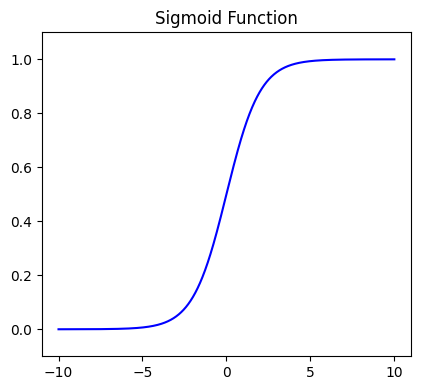

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 1000)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

y_sigmoid = sigmoid(x)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(x, y_sigmoid, label="Sigmoid", color='blue')
plt.title("Sigmoid Function")
plt.ylim(-0.1, 1.1)
plt.tight_layout()
plt.show()

2. ReLU
- $g(z)$ = $max(0,z)$

[ 특징 ]
1. 연속적이지만 z = 0에서 미분가능하지 않음
  - 이 특징으로 기울기가 갑자기 변해서 경사 하강법이 엉뚱한 곳으로 튈 수 있음
2. z < 0인 경우 도함수는 0이지만, 실제로는 잘 작동하고 계산 속도가 빠르다는 장점이 있음
3. 출력에 최댓값이 없다는 점에서 경사 하강법에 있는 일부 문제를 완화함

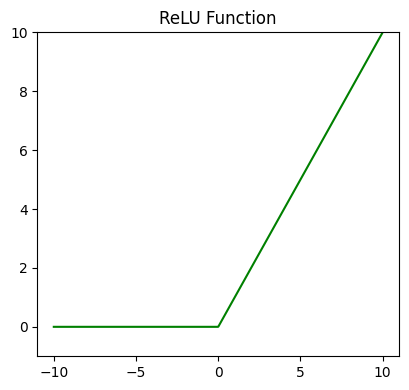

In [ ]:
def relu(x):
    return np.maximum(0, x)

y_relu = relu(x)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 2)
plt.plot(x, y_relu, label="ReLU", color='green')
plt.title("ReLU Function")
plt.ylim(-1, 10)
plt.tight_layout()
plt.show()

3. Tanh
- $g(z)$ = $\frac{e^z-e^{-z}}{e^z+e^{-z}}$

[ 특징 ]
1. sigmoid function(logistic function)처럼 S자 형태 곡선이며 연속적이고 미분가능
2. 출력 범위: (-1, 1)
  - 이 범위는 훈련 초기에 각 층의 출력을 원점 근처로 모으는 경향이 있음 -> 빠르게 수렴되도록 도와줌

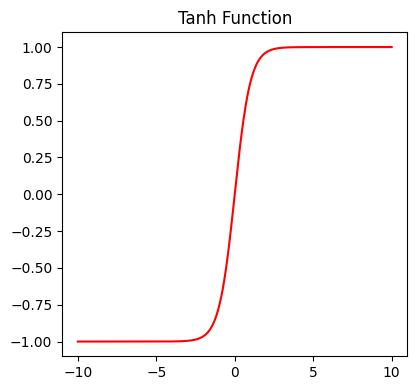

In [ ]:
def tanh(x):
    return np.tanh(x)

y_tanh = tanh(x)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 3)
plt.plot(x, y_tanh, label="Tanh", color='red')
plt.title("Tanh Function")
plt.ylim(-1.1, 1.1)
plt.tight_layout()
plt.show()

**(c) 스팸 메일을 분류하기 위해서는 출력층에 몇 개의 뉴런이 필요하며, 출력층에 어떤 활성
화 함수를 사용해야 하는가?**

출력층에 필요한 뉴런의 수 = 1개
- 스팸 메일 분류는 이진 분류이기 때문에, 메일이 스팸인지 아닌지만 고려하면 되므로 출력층에 1개의 뉴런만 있으면 됨

출력층에 사용해야 하는 활성화 함수 = 시그모이드 함수(Sigmoid function)
- 이진 분류에 많이 사용되는 시그모이드 함수는 출력 범위가 (0, 1)로 확률 값으로 변환
- 만약 threshold를 0.5로 설정하면, 출력이 0.5 이상이면 스팸, 아니면 스팸이 아닌 메일로 판단 가능

**(d) dimension이 (100, 10)인 데이터(target column 포함)를 이용하여 딥러닝 모델을 정의하고자
한다. 모델의 input layer를 정의할 때, 뉴런의 개수는 몇개여야 하는가?**

모델의 input layer의 뉴런의 개수: 9개
- 입력층의 뉴런의 개수는 feature의 개수와 같아야함
- 10개의 column에서 target column을 제외한 9개의 column이 feature가 됨

**(e) 배치 사이즈(batch size)와 에포크(epoch)의 차이에 대해서 서술하시오.**

1. 배치 사이즈(batch size)
- 한 번에 몇 개의 샘플을 학습할 것인지를 결정하는 개념
- 전체 훈련 데이터 셋을 여러 작은 그룹으로 나누었을 때, 하나의 소그룹에 해당되는 데이터의 수
  - 전체 훈련 데이터 셋을 미니 배치로 분할하는 이유는 훈련 데이터를 통째로 네트워크에 넣는 경우, 학습 시간이 오래 걸림

2. 에포크(epoch)
- 네트워크의 각 반복을 의미
- 전체 훈련 데이터 셋이 신경망을 통과한 횟수
- ex) 1 - epoch는 전체 훈련 데이터 셋이 하나의 신경망에 적용되어 순전파(Forward Propagation)와 역전파(Backward Propagation)를 통해 신경망을 한 번 통과했음을 의


**(f) 다음은 tensorflow 팀에서 만든 신경망 시뮬레이터이다. 모델 구조와 하이퍼파라미터를
조작하여 신경망에 대해 이해해보시오.**

Activation Function
- 주어지는 데이터의 분포에 따라 동일한 epoch 크기에서 상대적으로 낮은 loss를 보이는 활성화 함수(Activation Function)가 다름을 알 수 있음
  - 대체적으로 Relu가 가장 좋은 성능을 보이지만, 2개의 군집으로 이루어진 데이터는 Linear가 epoch의 크기가 작아도 상대적으로 더 빠르고 낮은 loss를 보임

Batch size
- 배치 사이즈가 클 수록 loss의 minimum을 찾아가는 데에 상대적으로 긴 시간이 걸림

위의 두 가지 파라미터 외에도 신경망을 다룰 때에 다양한 하이퍼 파라미터 튜닝이 필요로 함을 알 수 있음


### **Problem 2. Regression**

- 다음은 regression 에 대한 문제이다. 이용하는 데이터의 이름은 “regression_data”이며, 사이버
캠퍼스에서 받을 수 있다. 데이터의 dimension은 (731, 10)으로 이는 731개의 observation이 있
으며 1개의 target column과 9개의 feature column으로 구성되었음을 의미한다. 이 데이터는 bike
sharing에 관한 데이터로 한 시간당 대여된 자전거의 개수에 대한 정보를 담고 있다. 따라서,
target column은 cnt이며 나머지 9개의 column은 feature column이다.
- 데이터 변수에 대한 설명은 아래의 url을 참고할 것.

https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset
- random seed 설정에 유의할 것.

**(a) 데이터를 불러온 후 필요한 변수에 대하여 one-hot encoding과 label encoding을 하시오.**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data1=pd.read_csv('/content/drive/MyDrive/BBB data/regression_data.csv')
data1.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,2,0.344167,0.805833,0.160446,985
1,1,0,1,0,0,2,0.363478,0.696087,0.248539,801
2,1,0,1,0,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,0,2,1,0.200000,0.590435,0.160296,1562
4,1,0,1,0,3,1,0.226957,0.436957,0.186900,1600


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   weathersit  731 non-null    int64  
 6   temp        731 non-null    float64
 7   hum         731 non-null    float64
 8   windspeed   731 non-null    float64
 9   cnt         731 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 57.2 KB


In [ ]:
# one-hot encoding
data1=pd.get_dummies(data=data1,columns=['season','mnth','weekday'],
                        prefix=['season','mnth','weekday'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# label encoding
le=LabelEncoder()
data1['weathersit']=le.fit_transform(data1['weathersit'])

In [ ]:
data1.head()

,yr,holiday,weathersit,temp,hum,windspeed,cnt,season_1,season_2,season_3,...,mnth_10,mnth_11,mnth_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,1,0.344167,0.805833,0.160446,985,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,0,0,1,0.363478,0.696087,0.248539,801,True,False,False,...,False,False,False,True,False,False,False,False,False,False
2,0,0,0,0.196364,0.437273,0.248309,1349,True,False,False,...,False,False,False,False,True,False,False,False,False,False
3,0,0,0,0.200000,0.590435,0.160296,1562,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4,0,0,0,0.226957,0.436957,0.186900,1600,True,False,False,...,False,False,False,False,False,False,True,False,False,False


**(b) 데이터를 x(feature), y(target)로 분리하시오.**

In [ ]:
x=data1.drop('cnt',axis=1)
y=data1['cnt']

**(c) 데이터를 train/test data로 split 하시오. (train:test = 3:1, random seed = 777) 다음으로 numeric feature에 대하여 standardization을 적용하여 feature scaling을 하시오.**

In [ ]:
import numpy as np
import random
import tensorflow as tf

random.seed(777)
np.random.seed(777)
tf.random.set_seed(777)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=777)

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_features=['temp','hum','windspeed']

ss=StandardScaler()

X_train[numeric_features]=ss.fit_transform(X_train[numeric_features])
X_test[numeric_features]=ss.fit_transform(X_test[numeric_features])

**(d) 딥러닝 모델을 정의할 때 모델의 하이퍼 파라미터는 모델의 성능에 영향을 준다. 따라서,
좋은 성능의 모델을 찾기 위해선 은닉층의 개수, 층마다 있는 뉴런의 개수, 각 층에서 사
용하는 활성화 함수, 가중치 초기화, 에포트, 배치 사이즈 등 다양한 하이퍼 파라미터에
변화를 주며 최적의 조합을 찾아내야 한다. Keras를 이용하여 모델을 정의하도록 하며, 위
에서 언급한 하이퍼 파라미터의 설정에 변화를 주어 각각 다른 5개의 모델을 정의하시오.
(모델에 대한 코드를 반드시 첨부할 것.)**

[ 공통 조건 ]
- 모든 모델의 활성화 함수는 'relu'
- compile의 optimizer 파라미터는 'adam'
- 회귀 문제이므로 loss function과 metrics 파라미터는 모두 'mse'로 설정

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

Model1

hidden layer의 개수 = 2

In [ ]:
model1=tf.keras.Sequential([
    # input layer
    tf.keras.layers.Dense(64,activation='relu',input_dim=(len(data1.columns)-1)),
    # hidden layer
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    # output layer
    tf.keras.layers.Dense(1,activation='linear')
])
# model compile
model1.compile(optimizer='adam',loss='mse',metrics=['mse'])

# model summary
model1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,545 (17.75 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 0 (0.00 B)

Model2

hidden layer의 개수 = 4

In [ ]:
model2=tf.keras.Sequential([
    # input layer
    tf.keras.layers.Dense(256,activation='relu',input_dim=(len(data1.columns)-1)),

    # hidden layer
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),

    # output layer
    tf.keras.layers.Dense(1,activation='linear')
])

# model compile
model2.compile(optimizer='adam',loss='mse',metrics=['mse'])

# model summary
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │         7,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,457 (201.00 KB)

 Trainable params: 51,457 (201.00 KB)

 Non-trainable params: 0 (0.00 B)

Model3

hidden layer의 개수 = 4

Batch-Normalization layer 추가

In [ ]:
model3=tf.keras.Sequential([
    # input layer
    tf.keras.layers.Dense(256,activation='relu',input_dim=(len(data1.columns)-1)),
    tf.keras.layers.BatchNormalization(),

    # hidden layer
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.BatchNormalization(),

    # output layer
    tf.keras.layers.Dense(1,activation='linear')
])

# model compile
model3.compile(optimizer='adam',loss='mse',metrics=['mse'])

# model summary
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 256)            │         7,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,441 (208.75 KB)

 Trainable params: 52,449 (204.88 KB)

 Non-trainable params: 992 (3.88 KB)

Model4

hidden layer의 수 = 4개

input layer에 kernel_initializer = "he_normal" 추가

In [ ]:
model4=tf.keras.Sequential([
    # input layer
    tf.keras.layers.Dense(256,activation='relu',input_dim=(len(data1.columns)-1),
                          kernel_initializer='he_normal'),

    # hidden layer
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),

    # output layer
    tf.keras.layers.Dense(1,activation='linear')
])

# model compile
model4.compile(optimizer='adam',loss='mse',metrics=['mse'])

# model summary
model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 256)            │         7,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,457 (201.00 KB)

 Trainable params: 51,457 (201.00 KB)

 Non-trainable params: 0 (0.00 B)

Model5

hidden layer의 수 = 4개

hidden layer 사이에 drop out layer 추가

In [ ]:
model5=tf.keras.Sequential([
    # input layer
    tf.keras.layers.Dense(256,activation='relu',input_dim=(len(data1.columns)-1)),
    tf.keras.layers.Dropout(0.2),

    # hidden layer
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dropout(0.2),

    # output layer
    tf.keras.layers.Dense(1,activation='linear')
])

# model compile
model5.compile(optimizer='adam',loss='mse',metrics=['mse'])

# model summary
model5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 256)            │         7,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,457 (201.00 KB)

 Trainable params: 51,457 (201.00 KB)

 Non-trainable params: 0 (0.00 B)

**(e) $R^2$를 이용하여 모델의 성능을 판단하고, 어떤 모델의 성능이 가장 좋은지 서술하시오.**

Model1

In [ ]:
# Train
history1=model1.fit(X_train,y_train,batch_size=32,
                    epochs=100,validation_split=0.2,verbose=0)

In [ ]:
# Test
from sklearn.metrics import r2_score
score = r2_score(y_test, model1.predict(X_test))
print('Model1 R-squared: {0:.4f}'.format(score))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Model1 R-squared: 0.8214


Model2

In [ ]:
# Train
history2=model2.fit(X_train,y_train,batch_size=32,
                    epochs=100,validation_split=0.2,verbose=0)

In [ ]:
# Test
score = r2_score(y_test, model2.predict(X_test))
print('Model2 R-squared: {0:.4f}'.format(score))

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
Model2 R-squared: 0.8178


Model3

Batch-Nomalization layer 추가 후 loss와 mse의 감소 속도가 감소 -> epoch 증가

In [ ]:
# Train
history3=model3.fit(X_train,y_train,batch_size=32,
                    epochs=500,validation_split=0.2,verbose=0)

In [ ]:
# Test
score = r2_score(y_test, model3.predict(X_test))
print('Model3 R-squared: {0:.4f}'.format(score))

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model3 R-squared: -0.2075


Model4

In [ ]:
# Train
history4=model4.fit(X_train,y_train,batch_size=32,
                    epochs=100,validation_split=0.2,verbose=0)

In [ ]:
# Test
score = r2_score(y_test, model4.predict(X_test))
print('Model4 R-squared: {0:.4f}'.format(score))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Model4 R-squared: 0.8638


Model5

In [ ]:
# Train
history5=model5.fit(X_train,y_train,batch_size=32,
                    epochs=500,validation_split=0.2,verbose=0)

In [ ]:
# Test
score = r2_score(y_test, model5.predict(X_test))
print('Model5 R-squared: {0:.4f}'.format(score))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Model5 R-squared: 0.8120


|Parameter|Number of hidden layer|Batch-Nomalization|initialization|dropout|$R^2$
|-|-|-|-|-|-|
|model1|2|X|X|X|0.8214|
|model2|4|X|X|X|0.8178|
|model3|4|O|X|X|-0.2075|
|model4|4|X|O|X|0.8638|
|model5|4|X|X|O|0.8120|


Model4의 딥러닝 성능이 가장 높은 것을 알 수 있다.

추가적으로 Model3에서 매우 안 좋은 성능을 보이고 있음을 알 수 있다.

### **Problem 3. Classification**

- 다음은 classification에 관한 문제이다. 이용하는 데이터의 이름은 “classification_data”이며, 사이버 캠퍼스에서 받을 수 있다. 데이터의 dimension은 (4521, 17)으로 이는 4521개의 observation이
있으며 1개의 target column과 16개의 feature column으로 구성되었음을 의미한다. 이 데이터는
bank diposit에 관한 데이터로 보증금 대출가능 여부에 대한 정보를 담고 있다. Target column은
y이며 보증금 대출이 가능한 경우 “yes”, 불가능한 경우 “no”로 표기되어 있다.
- random seed 설정에 유의할 것.

**(a) 데이터를 불러온 후 필요한 변수에 대하여 one-hot encoding과 label encoding을 하시오.**

In [ ]:
import pandas as pd

data2=pd.read_csv('/content/drive/MyDrive/BBB data/classification_data.csv',sep=';')

In [ ]:
data2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


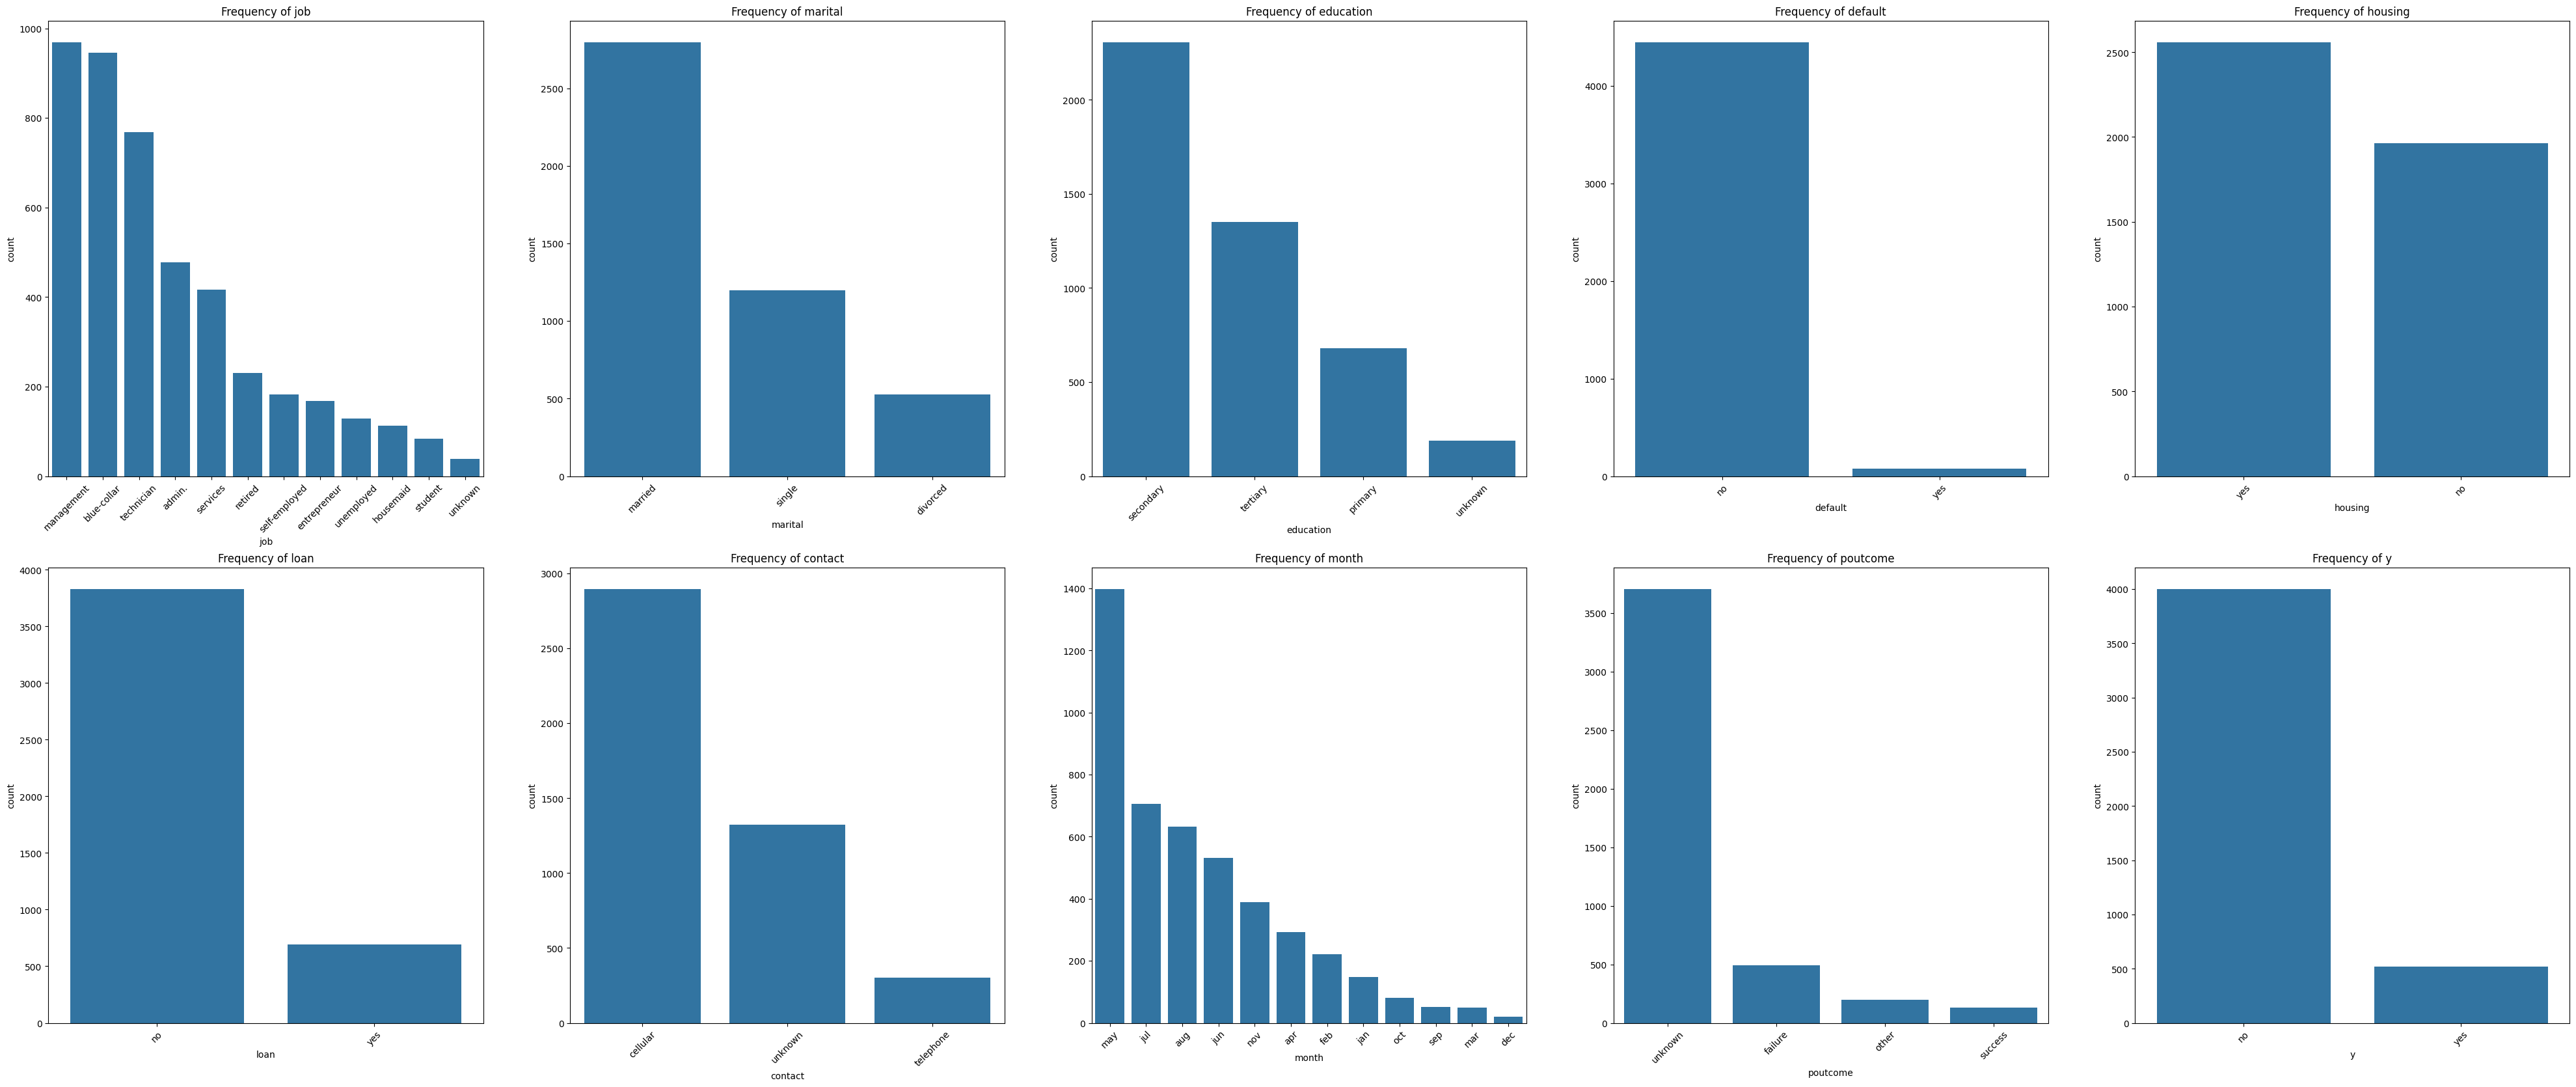

In [ ]:
categorical_var=['job','marital','education','default',
                 'housing','loan','contact','month','poutcome','y']

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(50, 20))

for i, col in enumerate(categorical_var, 1):
    plt.subplot(2, 5, i)
    sns.countplot(data=data2, x=col,
                  order=data2[col].value_counts().index)
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45)

plt.show()

In [ ]:
# one-hot encoding
data2=pd.get_dummies(data=data2,columns=categorical_var,
                        prefix=categorical_var)

In [ ]:
data2.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,30,1787,19,79,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,True,True,False
1,33,4789,11,220,1,339,4,False,False,False,...,True,False,False,False,True,False,False,False,True,False
2,35,1350,16,185,1,330,1,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,30,1476,3,199,4,-1,0,False,False,False,...,False,False,False,False,False,False,False,True,True,False
4,59,0,5,226,1,-1,0,False,True,False,...,True,False,False,False,False,False,False,True,True,False


**(b) 데이터를 x(feature), y(target)로 분리하시오.**

In [ ]:
x=data2.iloc[:,:-2]
y=data2.iloc[:,-2:]

**(c) 데이터를 train/test data로 split 하시오. (train:test = 3:1, random seed = 777) 다음으로 numeric
feature에 대하여 standardization을 적용하여 feature scaling을 하시오.**

In [ ]:
import numpy as np
import random
import tensorflow as tf

random.seed(777)
np.random.seed(777)
tf.random.set_seed(777)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=777)

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_features=['age','balance','duration','campaign','pdays']

ss=StandardScaler()

X_train[numeric_features]=ss.fit_transform(X_train[numeric_features])
X_test[numeric_features]=ss.fit_transform(X_test[numeric_features])

**(d) 딥러닝 모델을 정의할 때 모델의 하이퍼 파라미터는 모델의 성능에 영향을 준다. 따라서,
좋은 성능의 모델을 찾기 위해선 은닉층의 개수, 층마다 있는 뉴런의 개수, 각 층에서 사
용하는 활성화 함수, 가중치 초기화, 에포트, 배치 사이즈 등 다양한 하이퍼 파라미터에
변화를 주며 최적의 조합을 찾아내야 한다. Keras를 이용하여 모델을 정의하도록 하며, 위
에서 언급한 하이퍼 파라미터의 설정에 변화를 주어 각각 다른 5개의 모델을 정의하시오.
(모델에 대한 코드를 반드시 첨부할 것.)**

[ 공통 조건 ]

- 분류 모델이므로 마지막 계층(output layer)의 활성화 함수로 activation = 'softmax' 설정
- compile 함수에서 optimizer 파라미터는 tensorflow 모듈 내의 keras.optimizers.Adam(learning_rate=n)로 설정
- loss function은 'categorical_crossentropy'로 설정
- metrics는 'accuracy'
- Model4를 제외한 모든 모델의 은닉층(hidden layer)의 activation='relu'

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Model1
- hidden layer의 수 = 2
- learning rate = 0.001

In [ ]:
model1 = tf.keras.Sequential([
    # hidden layer
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=32, activation='relu'),
    # output layer
    tf.keras.layers.Dense(units=2, activation='softmax')
])
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 64)             │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,474 (21.38 KB)

 Trainable params: 5,474 (21.38 KB)

 Non-trainable params: 0 (0.00 B)

Model2
- hidden layer의 수 = 4개
- learning rate = 0.001

In [ ]:
model2 = tf.keras.Sequential([

    # hidden layer
    tf.keras.layers.Dense(units=256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),

    # output layer
    tf.keras.layers.Dense(units=2, activation='softmax')
])

model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 256)            │        13,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,610 (221.13 KB)

 Trainable params: 56,610 (221.13 KB)

 Non-trainable params: 0 (0.00 B)

Model3
- hidden layer의 수 = 3개
- hidden layer 사이에 drop out layer 추가
- learning rate = 0.001

In [ ]:
model3 = tf.keras.Sequential([

    # hidden layer
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    # output layer
    tf.keras.layers.Dense(2, activation='softmax')
])

model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss='categorical_crossentropy', metrics=['accuracy'])

model3.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                │ (None, 256)            │        13,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,594 (213.26 KB)

 Trainable params: 54,594 (213.26 KB)

 Non-trainable params: 0 (0.00 B)

Model4
- hidden layer의 수 = 4개
- activation='tanh'
- learning rate = 0.001

In [ ]:
model4 = tf.keras.Sequential([

    # hidden layer
    tf.keras.layers.Dense(128, activation='tanh', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(16, activation='tanh'),

    # output layer
    tf.keras.layers.Dense(2, activation='softmax')
])

model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss='categorical_crossentropy', metrics=['accuracy'])

model4.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 128)            │         6,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,554 (68.57 KB)

 Trainable params: 17,554 (68.57 KB)

 Non-trainable params: 0 (0.00 B)

Model5
- hidden layer의 수 = 4개
- hidden layer 사이에 drop out layer 추가
- 학습 시 batch size를 상대적으로 작게 설정
- learning rate = 0.001

In [ ]:
model5 = tf.keras.Sequential([
    # hidden layer
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    # output layer
    tf.keras.layers.Dense(2, activation='softmax')
])
model5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss='categorical_crossentropy', metrics=['accuracy'])

model5.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 128)            │         6,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,554 (68.57 KB)

 Trainable params: 17,554 (68.57 KB)

 Non-trainable params: 0 (0.00 B)

**(e) (d)의 결과에 대하여 모델별로 confution matrix를 구하시오. 어떤 모델의 성능이 가장 좋은가?**

Model1

In [ ]:
# Train
history1=model1.fit(X_train,y_train,epochs=100,batch_size=32,validation_split=0.25,verbose=0)

In [ ]:
# Test
loss,acc=model1.evaluate(X_test,y_test)
print('Model1 Accuracy: {:.4f}'.format(acc))

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8804 - loss: 1.9491
Model1 Accuracy: 0.8762


In [ ]:
# yes=1, no=0인 y_yes column 추출
y_test_c=y_test.iloc[:,1]

# 0.9 이상인 확률은 1, 아니면 0
predictions=model1.predict(X_test)
y_pred=(predictions > 0.9)

# confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_pred.argmax(axis = 1), y_test_c)
print(matrix)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[[957  78]
 [ 57  39]]


총 78 + 57 = 135개의 데이터를 오분류하였다.

Model2

In [ ]:
# Train
history2=model2.fit(X_train,y_train,epochs=100,batch_size=32,validation_split=0.25,verbose=0)

In [ ]:
# Test
loss,acc=model2.evaluate(X_test,y_test)
print('Model2 Accuracy: {:.4f}'.format(acc))

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8485 - loss: 1.1061
Model2 Accuracy: 0.8435


In [ ]:
# yes=1, no=0인 y_yes column 추출
y_test_c=y_test.iloc[:,1]

# 0.9 이상인 확률은 1, 아니면 0
predictions=model2.predict(X_test)
y_pred=(predictions > 0.9)

# confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_pred.argmax(axis = 1), y_test_c)
print(matrix)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[[930  77]
 [ 84  40]]


총 77 + 84 = 161개의 데이터를 오분류하였다.

Model3

drop out layer 추가 모델로 epoch의 크기를 증가시켜 학습 진행

In [ ]:
# Train
history3=model3.fit(X_train,y_train,epochs=500,batch_size=32,validation_split=0.25,verbose=0)

In [ ]:
# Test
loss,acc=model3.evaluate(X_test,y_test)
print('Model3 Accuracy: {:.4f}'.format(acc))

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8866 - loss: 1.9228
Model3 Accuracy: 0.8806


In [ ]:
# yes=1, no=0인 y_yes column 추출
y_test_c=y_test.iloc[:,1]

# 0.9 이상인 확률은 1, 아니면 0
predictions=model3.predict(X_test)
y_pred=(predictions > 0.9)

# confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_pred.argmax(axis = 1), y_test_c)
print(matrix)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[964  80]
 [ 50  37]]


총 80 + 50 = 130개의 데이터를 오분류하였다.

Model4

In [ ]:
# Train
history4=model4.fit(X_train,y_train,epochs=100,batch_size=32,validation_split=0.25,verbose=0)

In [ ]:
# Test
loss,acc=model4.evaluate(X_test,y_test)
print('Model4 Accuracy: {:.4f}'.format(acc))

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8741 - loss: 0.7222
Model4 Accuracy: 0.8744


In [ ]:
# yes=1, no=0인 y_yes column 추출
y_test_c=y_test.iloc[:,1]

# 0.9 이상인 확률은 1, 아니면 0
predictions=model4.predict(X_test)
y_pred=(predictions > 0.9)

# confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_pred.argmax(axis = 1), y_test_c)
print(matrix)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[[965  85]
 [ 49  32]]


총 85 + 49 = 134개의 데이터를 오분류하였다.

Model5

- drop out layer 추가 모델로 epoch의 크기를 증가시켜 학습
- batch size를 상대적으로 작은 값로 설정 후 학습

In [ ]:
# Train
history5=model5.fit(X_train,y_train,epochs=500,batch_size=8,validation_split=0.25,verbose=0)

In [ ]:
# Test
loss,acc=model5.evaluate(X_test,y_test)
print('Model5 Accuracy: {:.4f}'.format(acc))

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8927 - loss: 8.7598
Model5 Accuracy: 0.8877


In [ ]:
# yes=1, no=0인 y_yes column 추출
y_test_c=y_test.iloc[:,1]

# 0.9 이상인 확률은 1, 아니면 0
predictions=model5.predict(X_test)
y_pred=(predictions > 0.9)

# confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_pred.argmax(axis = 1), y_test_c)
print(matrix)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[968  83]
 [ 46  34]]


총 83 + 46 = 129개의 데이터를 오분류하였다.

|Parameter|Number of hidden layer|dropout|epoch|batch size|activation function|Accuracy|
|-|-|-|-|-|-|-|
|model1|2|X|100|32|relu|0.8762|
|model2|4|X|100|32|relu|0.8435|
|model3|4|O|500|32|relu|0.8806|
|model4|4|X|100|32|tanh|0.8744|
|model5|4|O|500|8|relu|0.8877|


Model5의 성능이 가장 좋다.